# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Use shape() to output the number of rows and columns in the dataframe.
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
order_id, customer_id, food_preparation_time, and delivery_time are integers

restaurant_name, cuisine_type, day_of_the_week, and rating are strings

cost_of_the_order is a float

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df["restaurant_name"]=df["restaurant_name"].astype("category")
df["cuisine_type"]=df["cuisine_type"].astype("category")
df["day_of_the_week"]=df["day_of_the_week"].astype("category")
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
Initially, the memory usage was 133.6+ KB.

After converting 3 columns from an object type to a category type, the memory usage is now 102.7+ KB.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Use describe() to view summarized information of numerical data.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

Min = 20 minutes

Avg = 27.37 minutes

Max = 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

Exploring a couple different ways to grab the number of orders not rated.

In [7]:
df[df["rating"]=="Not given"].count()

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64

In [8]:
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [10]:
# to get a better perspective of volume, find percent distribution of all the rating choices
round(df["rating"].value_counts()/df.shape[0]*100,2)

Not given    38.78
5            30.98
4            20.34
3             9.91
Name: rating, dtype: float64

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

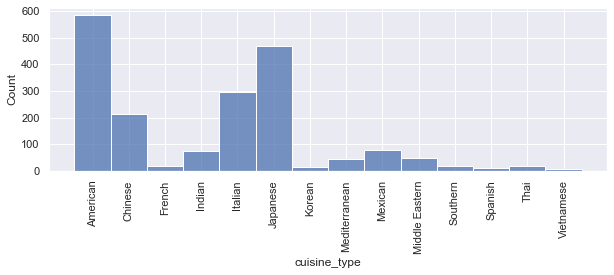

In [11]:
# Set the below to make the graph easier to read.
sns.set(color_codes=True)
# Set the figure size at an appropriate size for the Jupyter notebook.
sns.set(rc={"figure.figsize":(10,3)})
# View the distribution of orders across cuisines.
sns.histplot(data=df.cuisine_type)
# Rotate the x-axis labels to keep the graph within the width of the Jupyter notebook.
plt.xticks(rotation=90) 
plt.show()

#### Observations
American and Japanese food have the highest orders.

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost_of_the_order'>

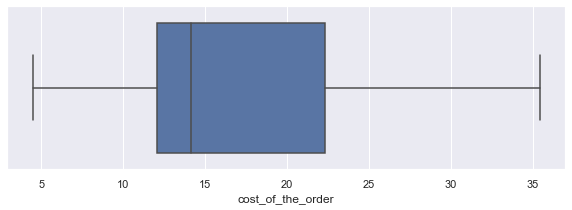

In [12]:
# View the distribution of order cost
sns.boxplot(df.cost_of_the_order)

<AxesSubplot:xlabel='day_of_the_week', ylabel='Count'>

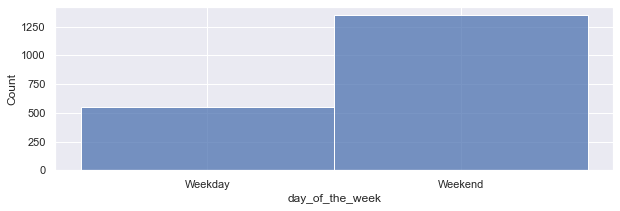

In [13]:
# View the distribution of day of the week.
sns.histplot(df.day_of_the_week)

#### Observations
More orders occur on weekends than weekdays.

<AxesSubplot:xlabel='rating', ylabel='Count'>

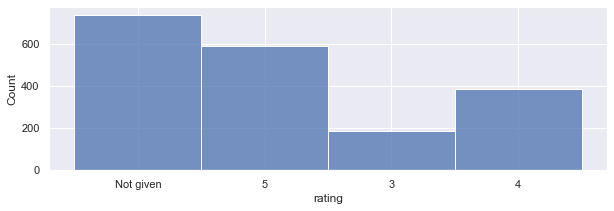

In [14]:
# view the distribution of order ratings.
sns.histplot(df.rating)

#### Observations:
Many orders don't have a rating.
No one gave ratings below 3.
Of the people that provided ratings, they are positive or neutral.

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='food_preparation_time'>

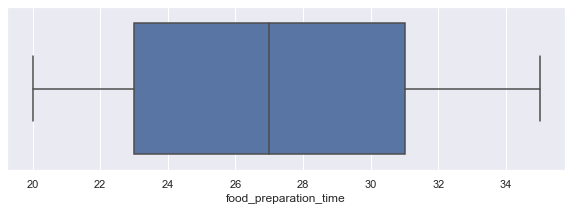

In [15]:
# View the distribution of food preparation time.
sns.boxplot(df.food_preparation_time)

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

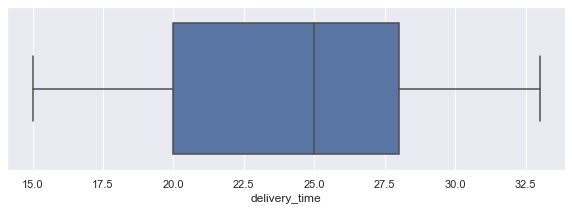

In [16]:
# View the distribution of delivery time.
sns.boxplot(df.delivery_time)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# value_counts will compile the number of cases for each value of a specified column and order them
df.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The restaurants with the most number of orders are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Friend Chicken (96), Parm (68)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

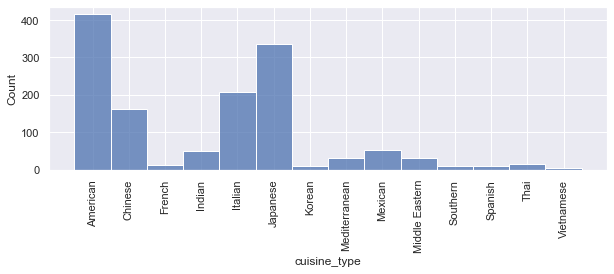

In [18]:
# Only plot the orders that were on a weekend
sns.histplot(df[df['day_of_the_week']=='Weekend'].cuisine_type)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

#### Observations:
American is the most popular cuisine on weekends. This is generally consistent with the above histogram that included weekday orders as well.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Utilize the shape function to grab number of rows for each case.
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations:
About 29% of orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
df.delivery_time.mean()

24.161749209694417

#### Observations:
The mean order delivery time is about 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
df.customer_id.value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
ID 52832 ordered 13 times, ID 47440 ordered 10 times, ID 83827 ordered 9 times, ID 250494 ordered 8 times, ID 259341 ordered 7 times

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


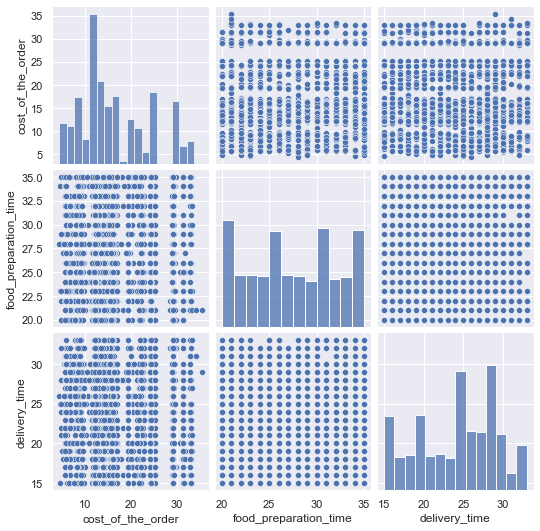

In [22]:
# scatter plots between all the variables that are integers and value makes sense 
# (e.g order_id and customer_id doesn't make sense here because higher value doesn't mean anything specific)
sns.pairplot(df[["cost_of_the_order","food_preparation_time","delivery_time"]])

#### Observations:
No correlations between the cost_of_the_order, food_preparation_time, delivery_time variables

C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.6% of the points 

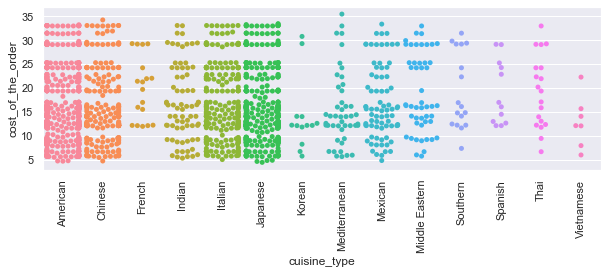

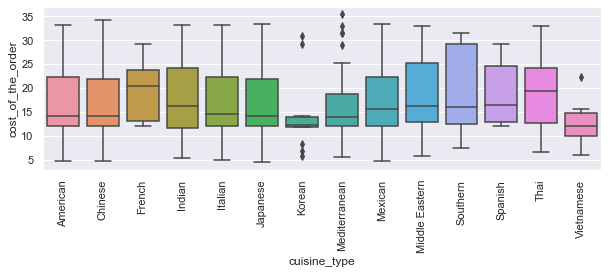

In [23]:
# Use swarm plots and box plots to view qualitative vs. quantitative data.

sns.swarmplot(data=df,x="cuisine_type",y="cost_of_the_order")
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()
sns.boxplot(data=df,x="cuisine_type",y="cost_of_the_order")
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

#### Observations:
Most Korean and Vietnamese food has low cost compared to other cuisines.
On average, French and Thai food has high cost compared to other cuisines.

C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points 

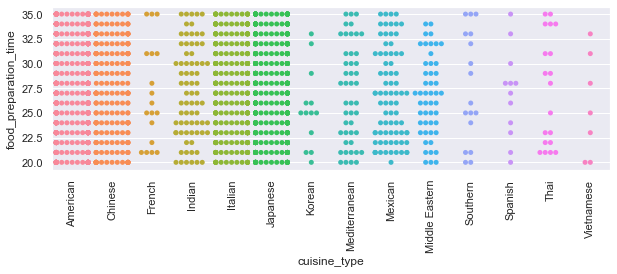

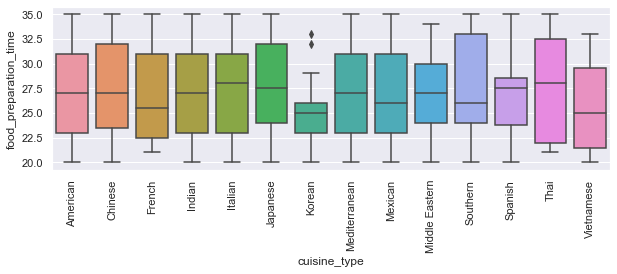

In [24]:
sns.swarmplot(data=df,x="cuisine_type",y="food_preparation_time")
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()
sns.boxplot(data=df,x="cuisine_type",y="food_preparation_time")
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

#### Observations:
Most Korean food has low food preparation time compared to other cuisines.

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

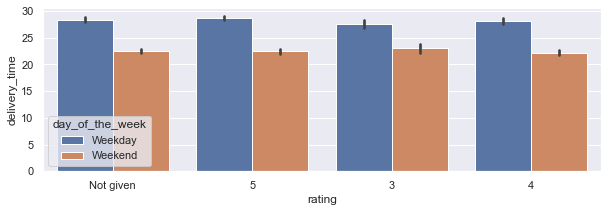

In [25]:
# Use bar plots with hues to compare multiple qualitative data pieces with quantitative data.
sns.barplot(data=df,x="rating",y="delivery_time",hue=df["day_of_the_week"])

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

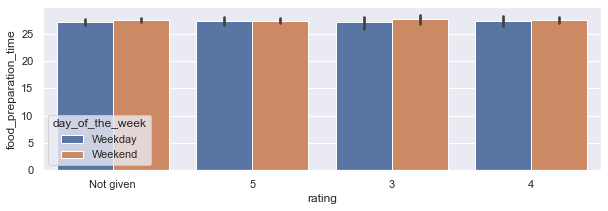

In [26]:
sns.barplot(data=df,x="rating",y="food_preparation_time",hue=df["day_of_the_week"])

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

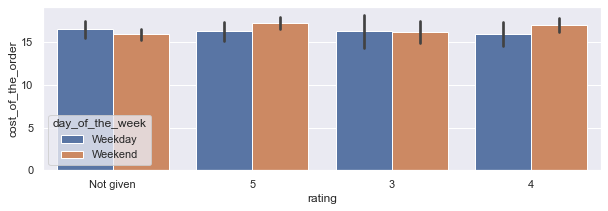

In [27]:
sns.barplot(data=df,x="rating",y="cost_of_the_order",hue=df["day_of_the_week"])

#### Observations:
Delivery time has no effect on rating provided.
Food preparation time has no effect on rating provided.
Day of the week has no effect on rating provided.
Delivery time is longer on weekdays than weekends.
Cost of the order has no effect on rating provided.
Cost of the order does not vary greatly between weekdays and weeknds.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# only hold order ids that have ratings
df_q13 = df[df["rating"]!="Not given"].copy()

# output restaurants that have a certain number of ratings
df_q13.restaurant_name.value_counts()


Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Market Table                   0
Paul & Jimmy's                 0
Room Service                   0
Rohm Thai                      0
Lamarca Pasta                  0
Name: restaurant_name, Length: 178, dtype: int64

Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are the restaurants that have more than 50 ratings. Now, we must find the restaurants that have an average rating greater than 4.

In [29]:
df_q13.shape

(1162, 9)

In [30]:
# only include the restaurants that have more than 50 ratings, save that in a variable
restaurant_names = ["Shake Shack","The Meatball Shop","Blue Ribbon Sushi","Blue Ribbon Fried Chicken"]
df_q13ratings = df_q13[df_q13["restaurant_name"].isin(restaurant_names)].copy()

In [31]:
df_q13ratings.shape

(354, 9)

In [32]:
# the ratings column is currently an object type, we should convert to an integer to do calculations
df_q13ratings["rating"]=df_q13ratings["rating"].astype("int64")

In [33]:
df_q13ratings.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,3.540000e+02,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.477520e+06,178725.090395,17.011582,4.330508,27.604520,24.347458
std,5.363928e+02,116913.125537,7.495781,0.749562,4.850348,4.893848
min,1.476548e+06,14869.000000,4.750000,3.000000,20.000000,15.000000
25%,1.477079e+06,79612.000000,12.130000,4.000000,23.000000,21.000000
50%,1.477543e+06,132143.000000,15.230000,4.500000,28.000000,25.000000
75%,1.477974e+06,294250.000000,24.200000,5.000000,32.000000,28.000000
max,1.478444e+06,400390.000000,33.370000,5.000000,35.000000,33.000000


In [34]:
# find the average rating for the restaurants that have more than 50 ratings
# dropna() is required to remove the clutter from other restaurants
df_q13ratings.groupby("restaurant_name")["rating"].mean().dropna()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are restaurants that both have more than 50 ratings and have an average rating higher than 4. They deserve the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [35]:
# grab the sum of the cost of all orders where the cost was more than $20
cost20 = df[df["cost_of_the_order"]>20]["cost_of_the_order"].sum()
cost20 = round(cost20,2)
print("Sum of the cost of all orders where the cost was more than $20 is $" + str(cost20))

# grab the sum of the cost of all orders where the cost was more than $5 and less than or equal to $20
cost5 = df[(df["cost_of_the_order"]>5) & (df["cost_of_the_order"]<=20)]["cost_of_the_order"].sum()
cost5 = round(cost5,2)
print("Sum of the cost of all orders where the cost was more than $5 and less than or equal to $20 is $" + str(cost5))

# calculate net revenue based on calculation in problem statement
netrev = round(round(cost20*0.25,2) + round(cost5*0.15,2),2)
netrev

Sum of the cost of all orders where the cost was more than $20 is $14754.91
Sum of the cost of all orders where the cost was more than $5 and less than or equal to $20 is $16517.17


6166.31

#### Observations:
The net revenue generated by the company is $6166.31.

Observe if charging 1% on orders less than or equal to $5 will lead to a sizeable revenue increase

In [36]:
# grab the sum of the cost of all orders where the cost was more than $5 and less than or equal to $20
cost1 = df[df["cost_of_the_order"]<=5]["cost_of_the_order"].sum()
cost1 = round(cost1,2)
print("Sum of the cost of all orders where the cost was more than $5 and less than or equal to $20 is $" + str(cost1))

rev1 = round(cost1*0.01,2)

Sum of the cost of all orders where the cost was more than $5 and less than or equal to $20 is $42.74


Observe if day of the week has a difference in net revenue.

In [37]:
# grab the sum of the cost of all weekday orders where the cost was more than $20
cost20day = df[(df["cost_of_the_order"]>20) & (df["day_of_the_week"]=="Weekday")]["cost_of_the_order"].sum()
cost20day = round(cost20day,2)
print("Sum of the cost of all weekday orders where the cost was more than $20 is $" + str(cost20day))

# grab the sum of the cost of all weekend orders where the cost was more than $20
cost20end = df[(df["cost_of_the_order"]>20) & (df["day_of_the_week"]=="Weekend")]["cost_of_the_order"].sum()
cost20end = round(cost20end,2)
print("Sum of the cost of all weekend orders where the cost was more than $20 is $" + str(cost20end))

# grab the sum of the cost of all weekday orders where the cost was more than $5 and less than or equal to $20
cost5day = df[(df["cost_of_the_order"]>5) & (df["cost_of_the_order"]<=20) & (df["day_of_the_week"]=="Weekday")]["cost_of_the_order"].sum()
cost5day = round(cost5day,2)
print("Sum of the cost of all weekday orders where the cost was more than $5 and less than or equal to $20 is $" + str(cost5day))

# grab the sum of the cost of all weekend orders where the cost was more than $5 and less than or equal to $20
cost5end = df[(df["cost_of_the_order"]>5) & (df["cost_of_the_order"]<=20) & (df["day_of_the_week"]=="Weekend")]["cost_of_the_order"].sum()
cost5end = round(cost5end,2)
print("Sum of the cost of all weekday orders where the cost was more than $5 and less than or equal to $20 is $" + str(cost5end))

print("The net revenue generated from weekend orders is $" + str(round(cost20end + cost5end,2)))
print("The net revenue generated from weekday orders is $" + str(round(cost20day + cost5day,2)))

Sum of the cost of all weekday orders where the cost was more than $20 is $4174.49
Sum of the cost of all weekend orders where the cost was more than $20 is $10580.42
Sum of the cost of all weekday orders where the cost was more than $5 and less than or equal to $20 is $4738.08
Sum of the cost of all weekday orders where the cost was more than $5 and less than or equal to $20 is $11779.09
The net revenue generated from weekend orders is $22359.51
The net revenue generated from weekday orders is $8912.57


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [38]:
# make a new column that is the sum of the food prep time and delivery time
df_q15 = df.copy()
df_q15['total_time'] = df_q15['food_preparation_time'] + df_q15['delivery_time']
df_q15.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [39]:
# Find the percentage of orders that had a total time of over 60 minutes
df_q15[df_q15['total_time']>60].shape[0]/df_q15.shape[0]*100

10.537407797681771

#### Observations:
About 10.5% of orders thad a delivery time more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [42]:
mean_weekday_delivery = round(df[df['day_of_the_week']=="Weekday"]["delivery_time"].mean(),2)
print("The mean weekday delivery time is " + str(mean_weekday_delivery) + " minutes.")
mean_weekend_delivery = round(df[df['day_of_the_week']=="Weekend"]["delivery_time"].mean(),2)
print("The mean weekend delivery time is " + str(mean_weekend_delivery) + " minutes.")

The mean weekday delivery time is 28.34 minutes.
The mean weekend delivery time is 22.47 minutes.


#### Observations:
The average delivery time on weekdays is about 28 minutes.
The average delivery time on weekends is about 22 minutes.
On avearge, delivery time is 6 minutes longer on weekdays than weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### The objective of this project was to gather information that help grow the food aggregator company by understanding the typical behavior of customers with their food orders. Here are some significant observations:

##### Cuisines
* Most orders are from American cuisines, followed by Japanese cuisines.

##### Day of the Week
* Delivery time for orders is 6 minutes longer on weekdays than weekends.
* About 50% more orders are placed on weekends than weekdays.
* Weekend orders generated about $10000 more net revenue than weekday orders.

##### Ratings

* Generally there is no correlation between customer rating and total delivery time or order cost.
* Almost 40% of orders don't have a rating provided.
* Of the customers that provided a rating, about 80% of them provided a rating of either 4 or 5.


#### The following are recommendations that can help improve the business:
* Make it required to enter a rating in the order app. This will provide us and restaurants with more data and adapt to decisions with stronger outcomes at an earlier point.
* Partner with more American and Japanese cuisines because these cuisines have the highest delivery demand. 
* Hire more delivery people on weekdays to keep delivery times consistent between weekdays and weekends.